In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2_contingency,chisquare,levene,bartlett,mannwhitneyu,wilcoxon

## 1.Import the data and assign appropriate column names

In [7]:
df = pd.DataFrame([i.strip().split() for i in open("airq402.dat").readlines()])
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [19]:
df.columns= ['City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline',
          'market share leading','Price Leading','Low price airline','market share trailing','Price Trailing']
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share leading,Price Leading,Low price airline,market share trailing,Price Trailing
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


## 2.Drop the variables which has textual information (categorical variables)

In [20]:
df1 = df.drop(['City1','City2','market leading airline','Low price airline'],axis=1)
df1.head()

,Average Fare,Distance,Average weekly passengers,market share leading,Price Leading,market share trailing,Price Trailing
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


## 3.Convert all the variable’s datatype to Integer 

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Average Fare                 1000 non-null float64
Distance                     1000 non-null float64
Average weekly passengers    1000 non-null float64
market share leading         1000 non-null float64
Price Leading                1000 non-null float64
market share trailing        1000 non-null float64
Price Trailing               1000 non-null float64
dtypes: float64(7)
memory usage: 54.8 KB


In [31]:
for col in df1.columns:
    print(col)
    df1[col] = df1[col].astype(float)

Average Fare
Distance
Average weekly passengers
market share leading
Price Leading
market share trailing
Price Trailing


In [33]:
for col in df1.columns:
    print(col)
    df1[col] = df1[col].astype(int)

Average Fare
Distance
Average weekly passengers
market share leading
Price Leading
market share trailing
Price Trailing


In [34]:
df1.head()

,Average Fare,Distance,Average weekly passengers,market share leading,Price Leading,market share trailing,Price Trailing
0,114,528,424,70,111,70,111
1,122,860,276,75,123,17,118
2,214,852,215,78,223,2,167
3,69,288,606,96,68,96,68
4,158,723,313,39,161,15,145


## 4.Remove all the outliers from the data using IQR method (Retain data points within 1.5 * IQR)

In [55]:
def out(df_in,col):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    IQR = q3-q1
    uw = q3+(1.5*IQR)
    lw = q1-(1.5*IQR)
    df_out = df_in[~((df_in < (q1 - 1.5 * IQR)) |(df_in > (q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

In [56]:
df1 = out(df1,df1.columns)

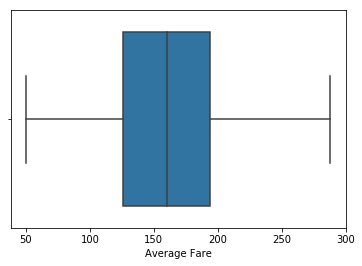

In [57]:
import seaborn as sns
sns.boxplot(df1['Average Fare'])

## 5.Print the correlation matrix

In [58]:
df1.corr()

,Average Fare,Distance,Average weekly passengers,market share leading,Price Leading,market share trailing,Price Trailing
Average Fare,1.000000,0.522609,-0.197014,-0.207874,0.979620,-0.494021,0.840969
Distance,0.522609,1.000000,-0.129640,-0.547132,0.489541,-0.361448,0.539772
Average weekly passengers,-0.197014,-0.129640,1.000000,0.022685,-0.163634,0.076881,-0.208752
market share leading,-0.207874,-0.547132,0.022685,1.000000,-0.193264,0.280838,-0.314804
Price Leading,0.979620,0.489541,-0.163634,-0.193264,1.000000,-0.519736,0.794175
market share trailing,-0.494021,-0.361448,0.076881,0.280838,-0.519736,1.000000,-0.261183
Price Trailing,0.840969,0.539772,-0.208752,-0.314804,0.794175,-0.261183,1.000000


## 6.Treat “Average Fare” –  as your Dependent Variable and the variable which has the highest correlation with Average Fare as the Independent Variable. Drop all the other variables

In [78]:
y = df1['Average Fare']
x = df1[['Price Leading']]
df2 = df1.drop(['Distance','Average weekly passengers','market share leading','market share trailing','Price Trailing'],axis=1)
df2.head()

,Average Fare,Price Leading
0,114,111
1,122,123
2,214,223
3,69,68
4,158,161


## 7.Create Scatter Plot of Independent Variable Vs Dependent Variable

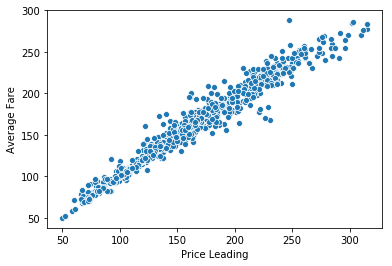

In [61]:
sns.scatterplot(x,y)

## 8.Divide the data set into training and test data set and build a Linear Regression model.

### Univariate Analysis

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [97]:
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [98]:
LR.coef_

array([0.89738129])

In [99]:
LR.intercept_

14.533034381727703

# RMSE

In [100]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

10.697937389919005

# Multivariate Analysis

In [101]:
df1.head()

,Average Fare,Distance,Average weekly passengers,market share leading,Price Leading,market share trailing,Price Trailing
0,114,528,424,70,111,70,111
1,122,860,276,75,123,17,118
2,214,852,215,78,223,2,167
3,69,288,606,96,68,96,68
4,158,723,313,39,161,15,145


In [105]:
x = df1[['Distance','Average weekly passengers','market share leading','Price Leading','market share trailing','Price Trailing']]
y = df1['Average Fare']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [106]:
LR.coef_

array([ 0.00288557, -0.00287635,  0.08652959,  0.72148208, -0.03598547,
        0.23258878])

In [107]:
LR.intercept_

4.635861023152188

# RMSE

In [108]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

8.119239304217487

# This shows that the multivariate analysis is good as compaired to univariate analysis can be seen from RMSE values

# Trying the Same Using OLS Method

In [116]:
import statsmodels.formula.api as smf
model = smf.ols('y~x',df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     5076.
Date:                Thu, 29 Aug 2019   Prob (F-statistic):               0.00
Time:                        19:06:55   Log-Likelihood:                -3107.9
No. Observations:                 885   AIC:                             6230.
Df Residuals:                     878   BIC:                             6263.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1349      1.886      2.722      0.007       1.433       8.837
x[0]           0.0029      0.001      4.663      0.000       0.002       0.004
x[1]          -0.0032      0.001     -3.781      0.000      -0.005      -0.002
x[2]           0.0737      0.018      4.160      0.000       0.039       0.109
x[3]           0.7454      0.010     71.699      0.000       0.725       0.766
x[4]          -0.0302      0.013     -2.304      0.021      -0.056      -0.004
x[5]           0.2077      0.013     15.930      0.000       0.182       0.233
==============================================================================
Omnibus:                      185.050   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              823.048
Skew:                           0.899   Prob(JB):                    1.89e-179
Kurtosis:                       7.369   Cond. No.                     8.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# As can be seen from the above summary, the p value of all the independent variables is less than 0.05, hence we reject the null hyp and that means that all the 6 independent variables contribute towards the dependent variable.

# 9.Print the train and test accuracy of the model 

In [123]:
print('R Square value is 0.972')
print('RMSE value is %1.4f'%np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R Square value is 0.972
RMSE value is 8.1192


# 10.Print the coefficient and the intercept of the model 

In [124]:
LR.coef_

array([ 0.00288557, -0.00287635,  0.08652959,  0.72148208, -0.03598547,
        0.23258878])

In [125]:
LR.intercept_

4.635861023152188